## Exploratory Data Analysis on Automobile Dataset 

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>

<a id=section1></a>

## 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

## 2. Data Loading and Description

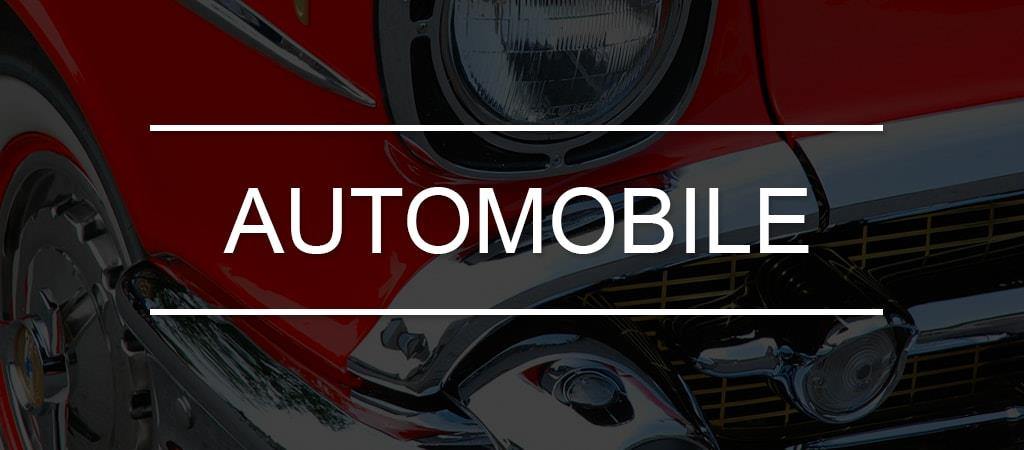

In [1]:
from IPython.display import Image
img = 'C:/users/adity/Downloads/auto.jpg'
Image(filename=img)

#### Importing packages  

In [103]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                   # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import matplotlib.image as mpimg
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


from subprocess import check_output

#### Importing the Dataset

In [5]:
df = pd.read_csv('C:\Python/Automobile_data.txt')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

## 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [6]:
df.shape                                                 # This will print the number of rows and comlumns of the Data Frame

(205, 26)

In [7]:
df.columns                                           # This will print the names of all columns.

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
df.head(10) 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [9]:
df.tail()                                             # This will print the last n rows of the Data Frame

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [10]:
df.info()                                              # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [11]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [13]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

From the above output we can see that there is no Null values in this data.


<a id=section302></a>

## 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.


In [14]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file("Automobile.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __Automobile.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

## 3.3 Preprocessing

#### Cleaning the normalized losses field

In [15]:
# Find out number of records having '?' value for normalized losses
df['normalized-losses'].loc[df['normalized-losses'] == '?'].count()

41

In [16]:
# Setting the missing value to mean of normalized losses and conver the datatype to integer
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nlmean).astype(int)
df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

#### Cleaning the price data

In [17]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [18]:
# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [19]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

#### Cleaning the horsepower

In [20]:
# Checking the numberic and replacing with mean value and conver the datatype to integer
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',pmean).astype(int)

In [21]:
#Checking the outlier of horsepower
df.loc[df['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9895


In [22]:
#Excluding the outlier data for horsepower
df[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,13207


#### Cleaning bore

In [23]:
# Find out the number of invalid value
df['bore'].loc[df['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [24]:
# Replace the non-numeric value to null and convert the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

#### Cleaning the stroke

In [25]:
# Replace the non-number value to null and convert the datatype
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

#### Cleaning the peak rpm data

In [26]:
# Convert the non-numeric data to null and convert the datatype
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

#### Cleaning the num-of-doors data 

In [27]:
# remove the records which are having the value '?'
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df = df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [28]:
df.bore.replace(np.NaN,df.bore.mean(),inplace=True)

In [29]:
df.stroke.replace(np.NaN,df.stroke.mean(),inplace=True)

<a id=section304></a>

## 3.4 Post Pandas Profiling

In [30]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file("Automobile_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values.So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __Automobile_after_preprocessing.html__ and __Automobile.html__.<br/>

### Univariate Analysis

Vehicle make frequency diagram

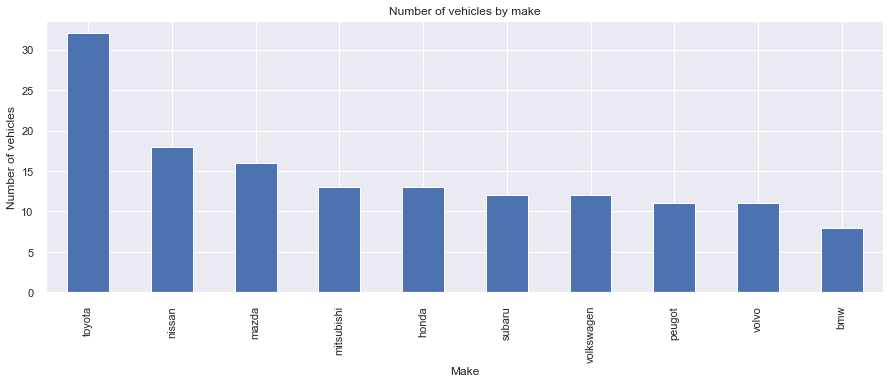

In [31]:
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

Insurance risk ratings Histogram

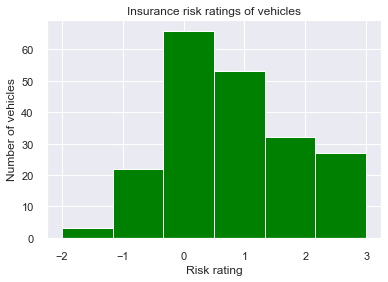

In [32]:
df.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

Normalized losses histogram

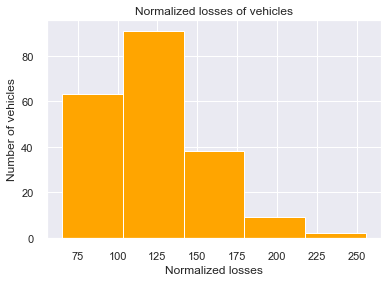

In [33]:
df['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

Fuel type bar chart

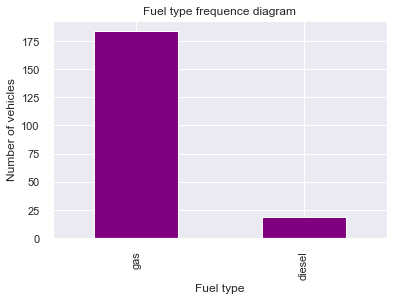

In [34]:
df['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

Fuel type pie diagram

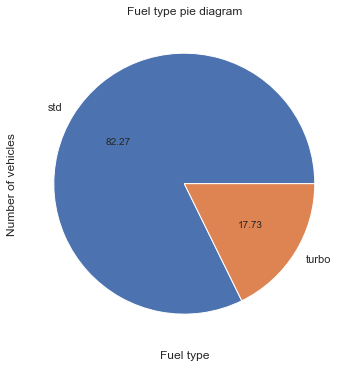

In [35]:
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

Horse power histogram

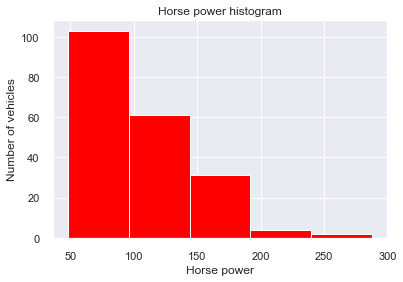

In [36]:
df.horsepower[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

Curb weight histogram

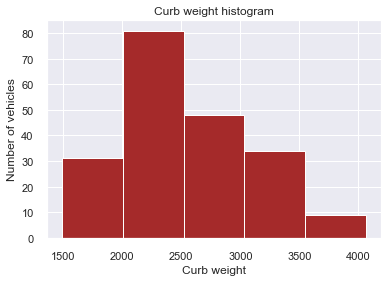

In [37]:
df['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

Drive wheels bar chart

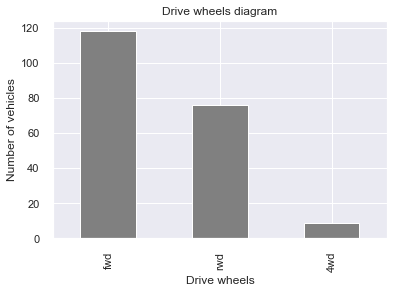

In [38]:
df['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

Number of doors bar chart

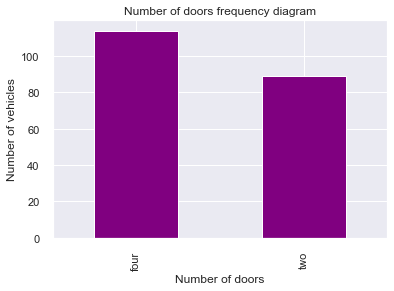

In [39]:
df['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

### Findings
- We have taken some key features of the automobile dataset for this analysis and below are our findings.

- Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
- Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
- For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number   of cars for four wheel drive.
- Curb weight of the cars are distributed between 1500 and 4000 approximately
- Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are   more cars in the range of 0 and 1.
- Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between   65 and 150.

## Correlation Analysis 

#### Findings: 
There are some good inferences we can take it from the correlation heat map.

- Price is more correlated with engine size and curb weight of the car
- Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the         weight of the car
- Wheel base is highly correlated with length and width of the car
- Symboling and normalized car are correlated than the other fields

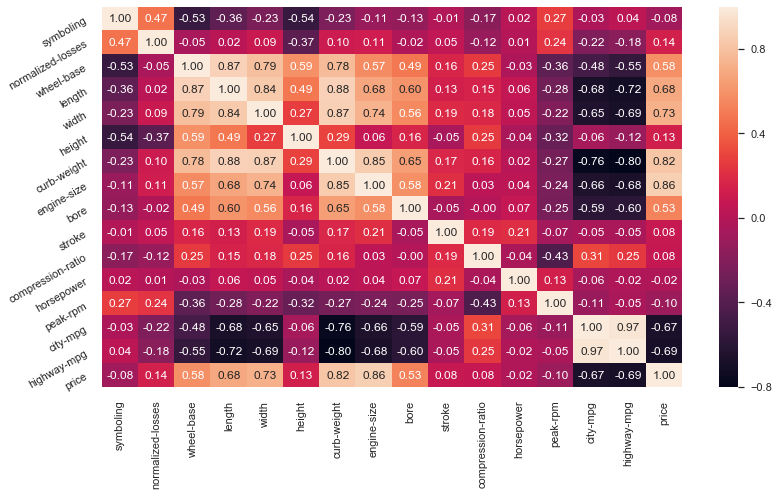

In [40]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Bivariate Analysis 

#### Boxplot of Price and make 

#### Findings: 
Below are our findings on the make and price of the car
   - The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet
   - The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche
   - Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
   - Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars

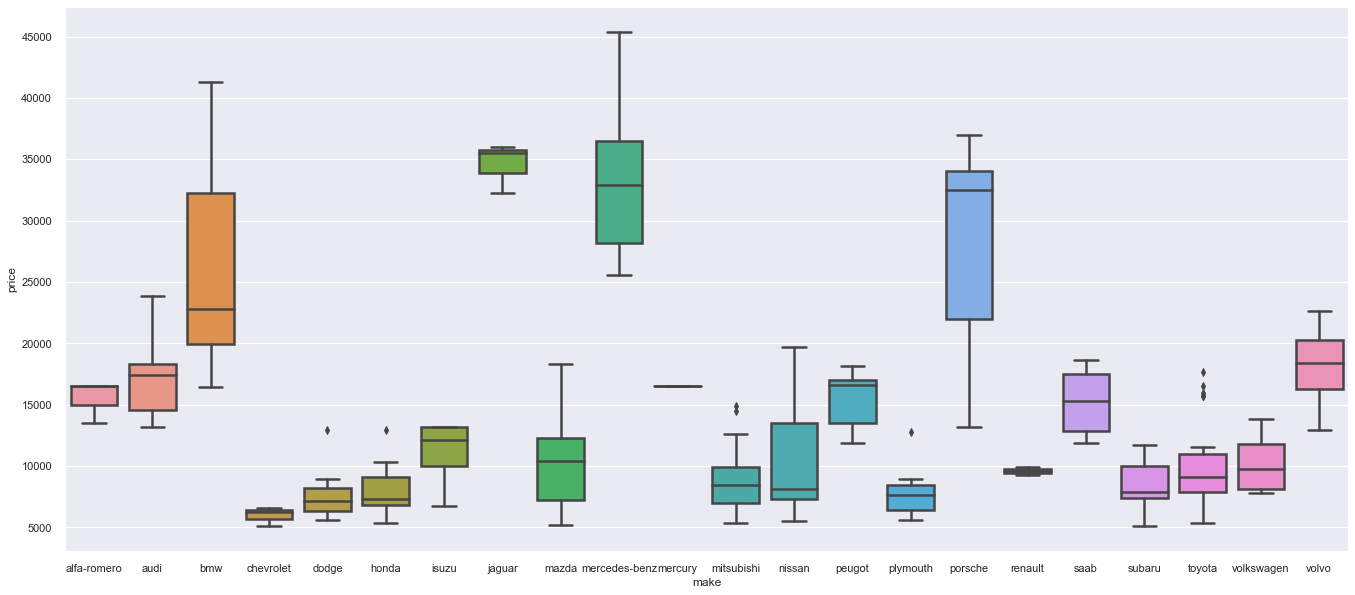

In [41]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

### Scatter plot of price and engine size¶ 

#### Findings: 
The more the engine size the costlier the price is

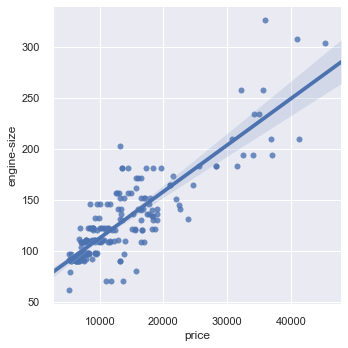

In [42]:
g = sns.lmplot('price',"engine-size", df);

### Scatter plot of normalized losses and symboling

#### Findings: 
From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. It looks like the negative ratings are better for the car which has lesser losses.

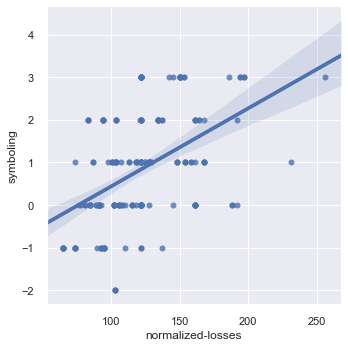

In [43]:
g = sns.lmplot('normalized-losses',"symboling", df);

### Scatter plot of Engine size and Peak RPM

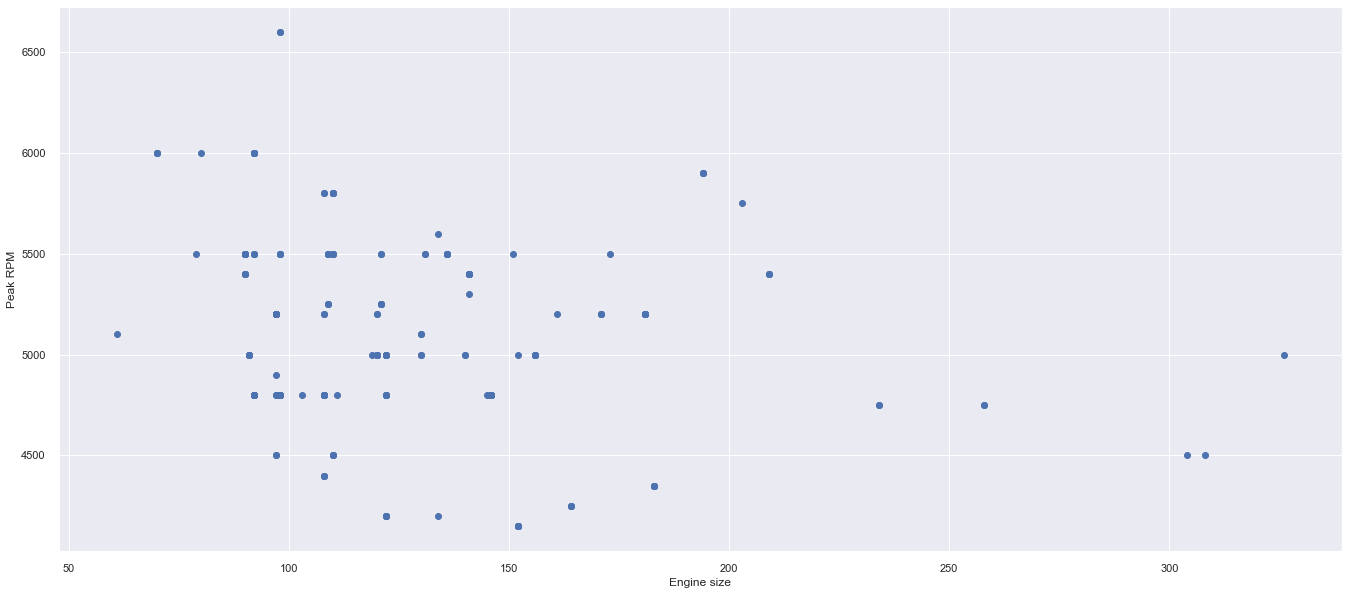

In [44]:
plt.scatter(df['engine-size'],df['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

### Scatter plot of City and Highway MPG, Curb weight based on Make of the car
Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage of the automobile is inversely proportional to the curb weight.

Heavier the Automobile less is the mileage for both City and Highway

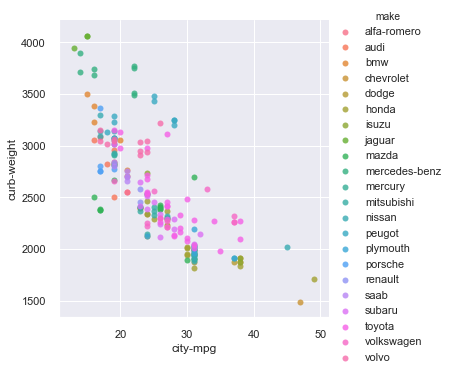

In [45]:
g = sns.lmplot('city-mpg',"curb-weight", df, hue="make", fit_reg=False);

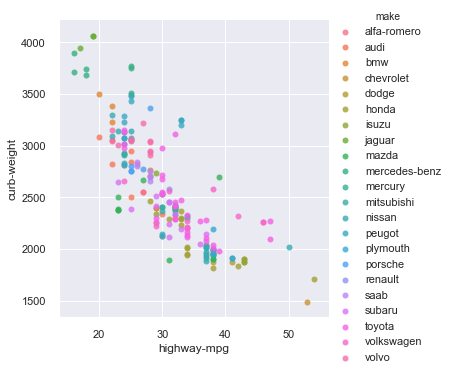

In [46]:
g = sns.lmplot('highway-mpg',"curb-weight", df, hue="make",fit_reg=False);

#### Drive wheels and City MPG bar chart

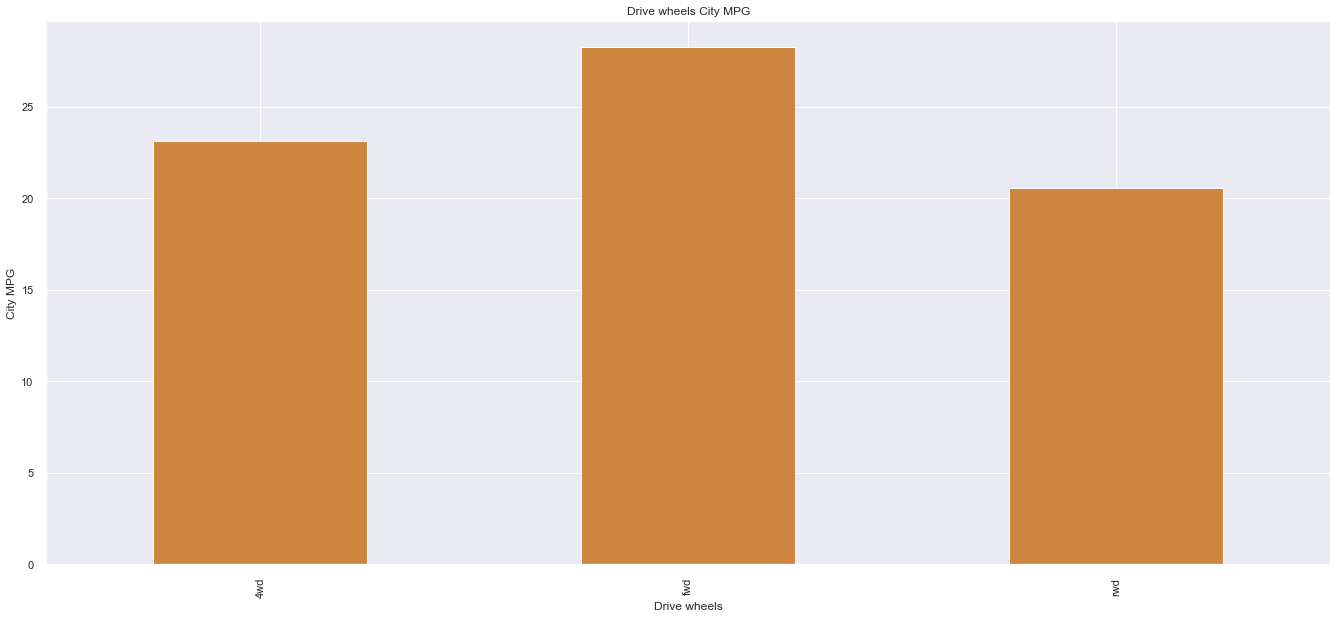

In [47]:
df.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

#### Drive wheels and Highway MPG bar chart

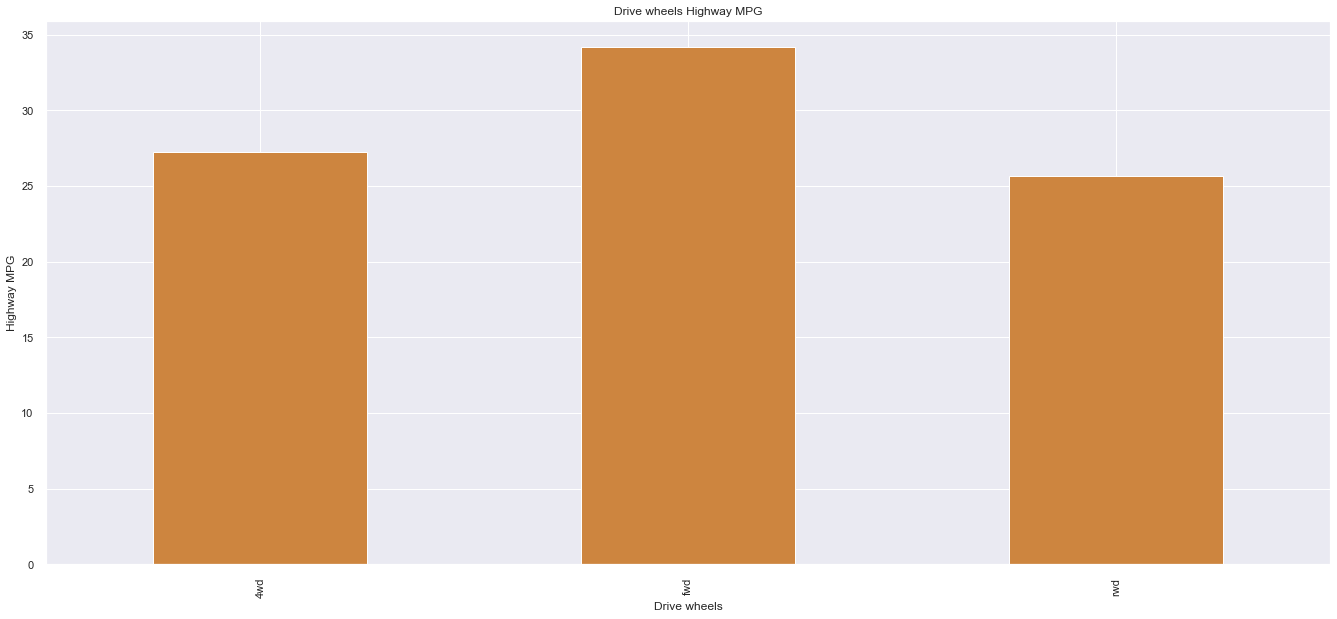

In [48]:
df.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

### Boxplot of Drive wheels and Price
#### Findings: 
It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.

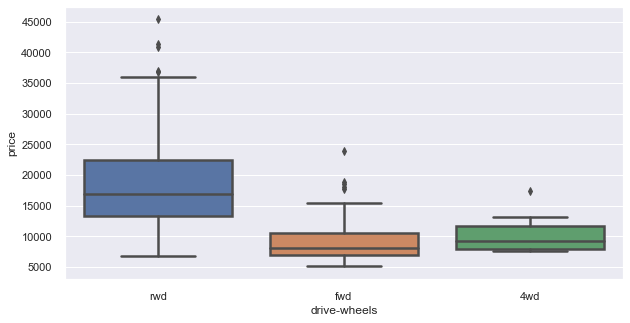

In [49]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

### Normalized losses based on body style and no. of doors
#### Findings: 
As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

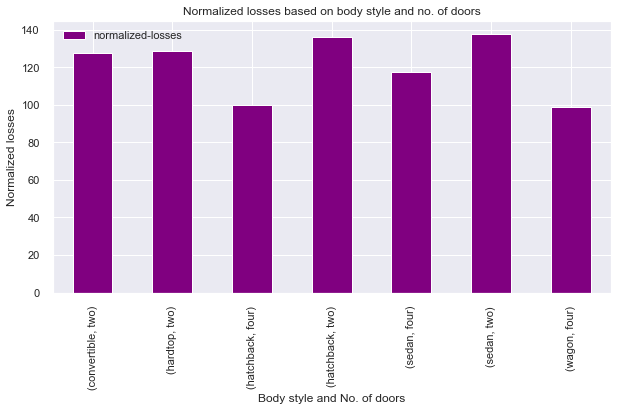

In [50]:
pd.pivot_table(df,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

## Conclusion
Analysis of the data set provides

- How the data set are distributed
- Correlation between different fields and how they are related
- Normalized loss of the manufacturer
- Symboling : Cars are initially assigned a risk factor symbol associated with its price
- Mileage : Mileage based on City and Highway driving for various make and attributes
- Price : Factors affecting Price of the Automobile.
- Importance of drive wheels and curb weight

In [51]:
num_cols = []
cat_cols = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        cat_cols.append(i)
    else:
        num_cols.append(i)
        
print(num_cols)
print(cat_cols)

['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [52]:
df = df.drop(['height', 'stroke', 'compression-ratio', 'peak-rpm', 'num-of-doors'], axis=1)
df.head()

# removing those name from the list num_cols
for i in ['height', 'stroke', 'compression-ratio', 'peak-rpm']:
    num_cols.remove(i)
    
# removing those name from the list cat_cols
cat_cols.remove('num-of-doors')

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in num_cols[:-1]:
    df[i] = df[i].astype('float64')
    df[i] =  sc.fit_transform(df[i].values.reshape(-1,1))
    
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,1.734298,0.004040,alfa-romero,gas,std,convertible,rwd,front,-1.689532,-0.431672,...,-0.019023,dohc,four,0.070180,mpfi,0.513730,-0.094659,-0.640559,-0.539468,13495
1,1.734298,0.004040,alfa-romero,gas,std,convertible,rwd,front,-1.689532,-0.431672,...,-0.019023,dohc,four,0.070180,mpfi,0.513730,-0.094659,-0.640559,-0.539468,16500
2,0.130369,0.004040,alfa-romero,gas,std,hatchback,rwd,front,-0.710457,-0.236687,...,0.508536,ohcv,six,0.597834,mpfi,-2.405082,-0.061447,-0.947604,-0.685290,16500
3,0.932333,1.328701,audi,gas,std,sedan,fwd,front,0.169051,0.202028,...,-0.423805,ohc,four,-0.433489,mpfi,-0.520786,-0.101610,-0.179992,-0.102003,13950
4,0.932333,1.328701,audi,gas,std,sedan,4wd,front,0.102673,0.202028,...,0.510454,ohc,five,0.214086,mpfi,-0.520786,-0.091570,-1.101126,-1.268577,17450


In [55]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.734298,0.004040,-1.689532,-0.431672,-0.846292,-0.019023,0.070180,0.513730,-0.094659,-0.640559,...,0,0,0,0,0,0,0,1,0,0
1,1.734298,0.004040,-1.689532,-0.431672,-0.846292,-0.019023,0.070180,0.513730,-0.094659,-0.640559,...,0,0,0,0,0,0,0,1,0,0
2,0.130369,0.004040,-0.710457,-0.236687,-0.193602,0.508536,0.597834,-2.405082,-0.061447,-0.947604,...,0,0,0,0,0,0,0,1,0,0
3,0.932333,1.328701,0.169051,0.202028,0.132743,-0.423805,-0.433489,-0.520786,-0.101610,-0.179992,...,0,0,0,0,0,0,0,1,0,0
4,0.932333,1.328701,0.102673,0.202028,0.225984,0.510454,0.214086,-0.520786,-0.091570,-1.101126,...,0,0,0,0,0,0,0,1,0,0


In [56]:
X = df.drop('price', axis=1)
print(X.shape)

(203, 60)


In [57]:
y = df.price
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(203,)


In [58]:
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [59]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (162, 60)
y_train shape:  (162,)

Test cases as below
X_test shape:  (41, 60)
y_test shape:  (41,)


## Linear Regerssion 

42434979014483.82
5.132419537345116e+28
-8.85954878313682e+20


[]

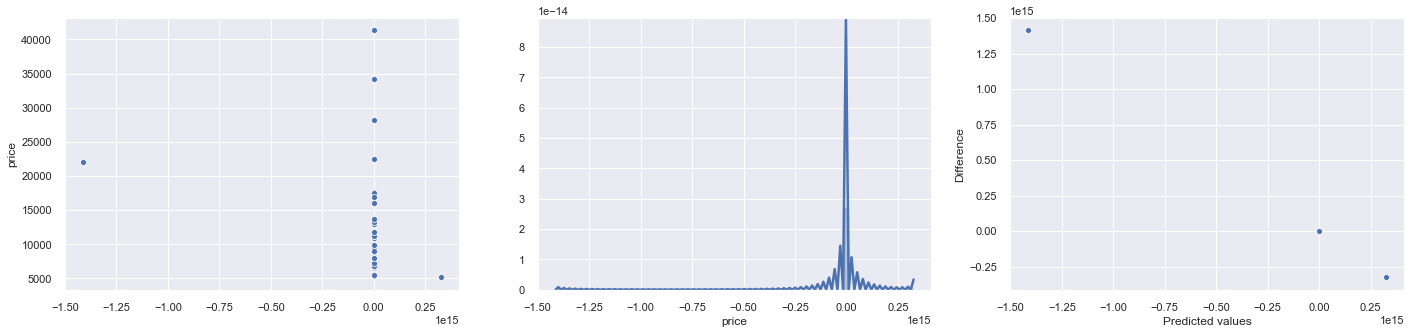

In [102]:

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

fig, ax = plt.subplots(1, 3, figsize=(24, 5))

sns.scatterplot(x=pred, y=y_test, ax=ax[0])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.plot()

sns.distplot(pred-y_test, ax=ax[1])
plt.xlabel("Difference")
plt.ylabel("Count")
plt.plot()

sns.scatterplot(x=pred, y=y_test-pred, ax=ax[2])
plt.xlabel("Predicted values")
plt.ylabel("Difference")
plt.plot()

## Decision Tree Regressor 

1632.3292682926829
8025753.7621951215
0.8614599674476489


[]

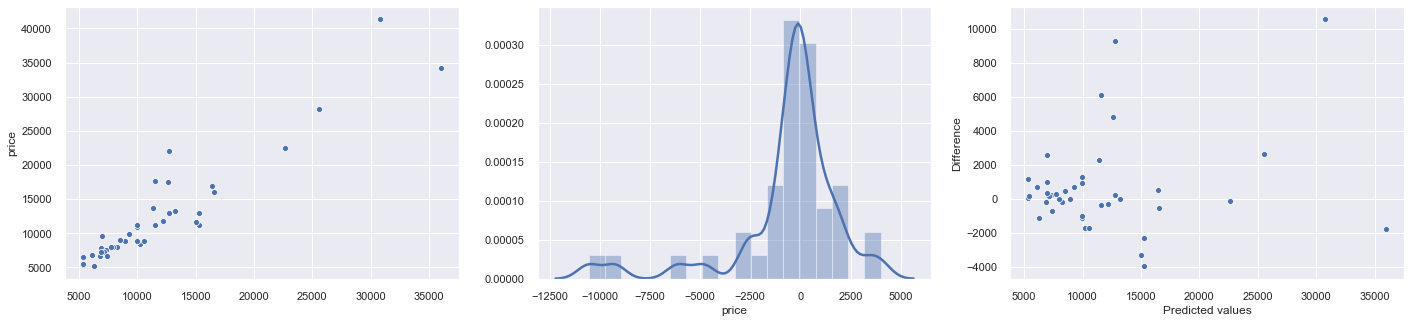

In [100]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

fig, ax = plt.subplots(1, 3, figsize=(24, 5))

sns.scatterplot(x=pred, y=y_test, ax=ax[0])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.plot()

sns.distplot(pred-y_test, ax=ax[1])
plt.xlabel("Difference")
plt.ylabel("Count")
plt.plot()

sns.scatterplot(x=pred, y=y_test-pred, ax=ax[2])
plt.xlabel("Predicted values")
plt.ylabel("Difference")
plt.plot()

## Random Forest Regressor 

1456.2021544715446
5180426.546082702
0.9105758183474265


[]

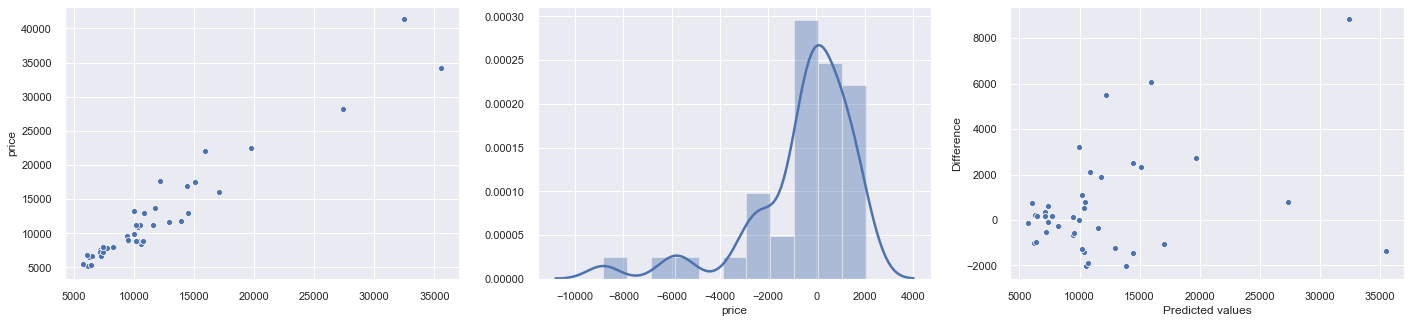

In [101]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

fig, ax = plt.subplots(1, 3, figsize=(24, 5))

sns.scatterplot(x=pred, y=y_test, ax=ax[0])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.plot()

sns.distplot(pred-y_test, ax=ax[1])
plt.xlabel("Difference")
plt.ylabel("Count")
plt.plot()

sns.scatterplot(x=pred, y=y_test-pred, ax=ax[2])
plt.xlabel("Predicted values")
plt.ylabel("Difference")
plt.plot()